In [1]:
!pip install keras

In [3]:
# importing VGG16 model from keras 
from keras.applications import VGG16

# instantiating VGG convolutional base
conv_base = VGG16(weights = 'imagenet', 
                 include_top = False, # whether to include densely connected layer form VGG16 or not
                 input_shape = (150,150,3))

Using TensorFlow backend.


58892288/58889256 [==============================] - 4s 0us/step


In [4]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [5]:
!wget --no-check-certificate \
   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O \
   /tmp/cats_and_dogs_filtered.zip

--2018-10-20 19:33:25--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   118MB/s    in 0.6s    

2018-10-20 19:33:26 (118 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [6]:
import os
import zipfile

from keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# define out directory and files
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

# data agumentation to avoid over fitting 
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

# validation data should not be agumneted
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary') 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
# adding densely connected layer on top of convbase of VGG16
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
# adding dropout layer to avoid overfitting
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [9]:
# freezing the conv_base so that it prevents their weights to be updated
print ('this is the number of trainable weights before freezing the conv_base',len(model.trainable_weights))

this is the number of trainable weights before freezing the conv_base 30


In [0]:
# freezing
conv_base.trainable = False

In [11]:
print ('this is the number of trainable weights after freezing the conv_base',len(model.trainable_weights))

this is the number of trainable weights after freezing the conv_base 4


In [12]:
from keras import optimizers
# compiling the model
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 2e-5),
              metrics = ['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 50)

Epoch 1/10
100/100 [==============================] - 736s 7s/step - loss: 0.6794 - acc: 0.5750 - val_loss: 0.5457 - val_acc: 0.7190
Epoch 2/10
100/100 [==============================] - 717s 7s/step - loss: 0.5833 - acc: 0.6870 - val_loss: 0.4538 - val_acc: 0.8020
Epoch 3/10
100/100 [==============================] - 717s 7s/step - loss: 0.5284 - acc: 0.7385 - val_loss: 0.3931 - val_acc: 0.8300
Epoch 4/10
100/100 [==============================] - 717s 7s/step - loss: 0.4881 - acc: 0.7760 - val_loss: 0.3724 - val_acc: 0.8280
Epoch 5/10
100/100 [==============================] - 718s 7s/step - loss: 0.4539 - acc: 0.7875 - val_loss: 0.3630 - val_acc: 0.8290
Epoch 6/10
100/100 [==============================] - 715s 7s/step - loss: 0.4554 - acc: 0.7780 - val_loss: 0.3428 - val_acc: 0.8490
Epoch 7/10
100/100 [==============================] - 715s 7s/step - loss: 0.4127 - acc: 0.8150 - val_loss: 0.3244 - val_acc: 0.8550
Epoch 8/10
100/100 [==============================] - 716s 7s/step - 

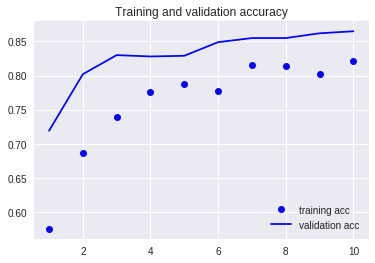

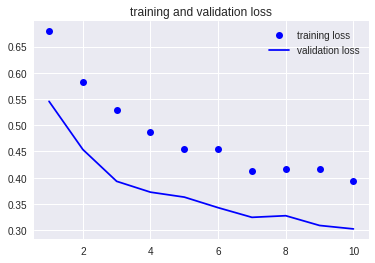

In [13]:
# plotting the results

%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs , acc , 'bo',label = 'training acc')
plt.plot(epochs, val_acc,'b',label ='validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs , loss , 'bo',label = 'training loss')
plt.plot(epochs , val_loss , 'b',label = 'validation loss')
plt.title ('training and validation loss')
plt.legend()

plt.show()

final validation accuracy after 10th epoch is 86.5% . it isn't the best, but considering a small sample dataset 2000 images the model is doing good.



